In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mendley_Data_Student_Performance.csv')

display(df.head())
display(df.info())

,Department,Gender,Unnamed Column,Unnamed Column.1,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Other Irrelevant Column,Other Irrelevant Column.1,Other Irrelevant Column.2,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
Department                   493 non-null object
Gender                       493 non-null object
Unnamed Column               493 non-null float64
Unnamed Column.1             493 non-null float64
Income                       493 non-null object
Hometown                     493 non-null object
Computer                     493 non-null int64
Preparation                  493 non-null object
Gaming                       493 non-null object
Attendance                   493 non-null object
Job                          493 non-null object
English                      493 non-null int64
Other Irrelevant Column      493 non-null object
Other Irrelevant Column.1    493 non-null object
Other Irrelevant Column.2    493 non-null float64
Overall                      493 non-null float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.7+ KB


None

In [7]:
unnecessary_columns = ['Unnamed Column', 'Other Irrelevant Column'] 
df.drop(columns=[col for col in unnecessary_columns if col in df.columns], inplace=True)

df.dropna(inplace=True)
department_rename = {
    'Business Administration': 'Bus Admin',
    'Computer Science and Engineering': 'CSE',
    'Electrical and Electronic Engineering': 'EEE',
    'Mechanical Engineering': 'ME',
    'Civil Engineering': 'CE',
    'Journalism, Communication and Media Studies': 'Journalism'
}
df['Department'] = df['Department'].replace(department_rename)

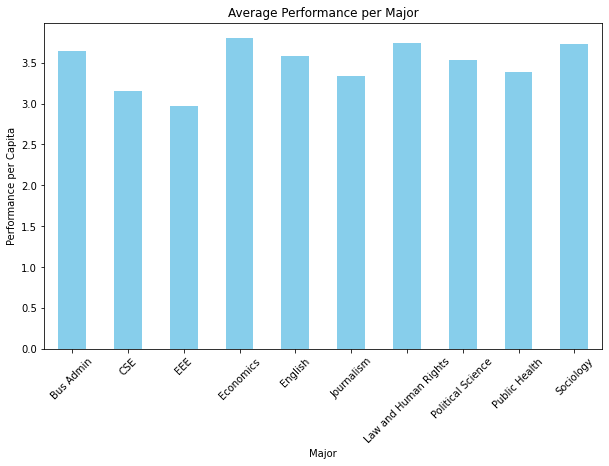

In [8]:
grouped = df.groupby('Department')['Overall'].mean()

plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Average Performance per Major')
plt.xlabel('Major')
plt.ylabel('Performance per Capita')
plt.xticks(rotation=45)
plt.show()

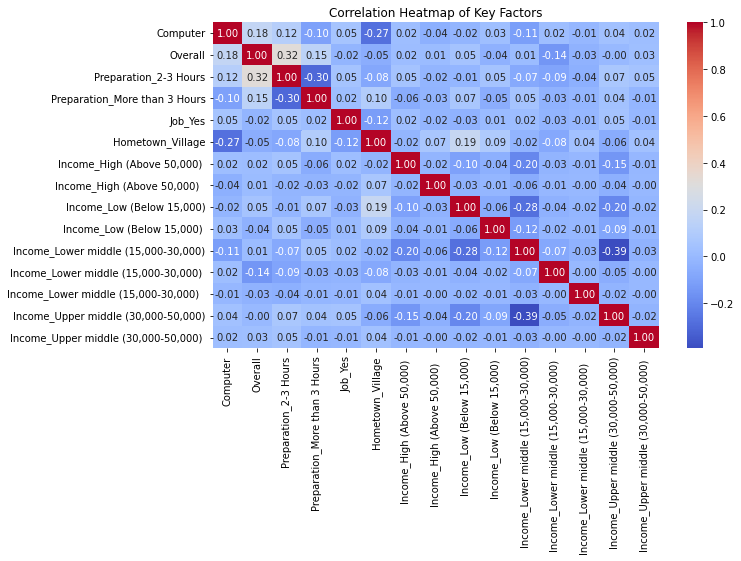

In [4]:
selected_columns = ['Preparation', 'Job', 'Hometown', 'Computer', 'Income', 'Overall']
df_selected = df[selected_columns].copy()

df_selected = pd.get_dummies(df_selected, drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Factors')
plt.show()